In [8]:
import numpy
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD , Adam
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import GlobalAveragePooling2D , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from keras import backend as K


In [9]:
seed = 7
numpy.random.seed(seed)

In [10]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [11]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0


In [12]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


In [13]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32,3),kernel_regularizer=regularizers.l2(0.01), activation='elu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3),kernel_regularizer=regularizers.l2(0.0001), activation='elu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3),kernel_regularizer=regularizers.l2(0.0001), activation='elu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3),kernel_regularizer=regularizers.l2(0.0001), activation='elu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3),kernel_regularizer=regularizers.l2(0.0001), activation='elu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(512, (3, 3),kernel_regularizer=regularizers.l2(0.0001), activation='elu', padding='same'))
model.add(BatchNormalization())
model.add(keras.layers.Dropout(0.3))
model.add(Conv2D(512, (3, 3),kernel_regularizer=regularizers.l2(0.0001), activation='elu', padding='same'))
model.add(BatchNormalization())
model.add(keras.layers.Dropout(0.3))
model.add(GlobalAveragePooling2D())
model.add(Dense(num_classes, activation='softmax'))
# Compile model
epochs = 30
lrate = 0.001
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
Adam = Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0, amsgrad=False)
model.compile(loss='categorical_crossentropy', optimizer=Adam, metrics=['accuracy'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_9 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_10 (Batc (None, 16, 16, 64)        256       
__________

In [34]:
save=keras.callbacks.ModelCheckpoint('/home/ramreddyy/model_save1', monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)
tensor=keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=0, batch_size=16, write_graph=True, write_grads=False, write_images=False, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None)

In [44]:
datagen = keras.preprocessing.image.ImageDataGenerator(
            width_shift_range=1.0,  
            height_shift_range=1.0, 
            horizontal_flip=True,
            vertical_flip=False)
history2 = model.fit_generator(datagen.flow(X_train, y_train,
              batch_size=64),
              epochs = 1,steps_per_epoch=782,
              verbose=1,
              validation_data=(X_test, y_test),callbacks=[save,tensor])


Epoch 1/1
782/782 [==============================] - 25s 31ms/step - loss: 0.0049 - acc: 0.9987 - val_loss: 0.6305 - val_acc: 0.8706


In [28]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 87.03%


In [41]:
print(history2.history['loss'])

[0.003731642184102384]


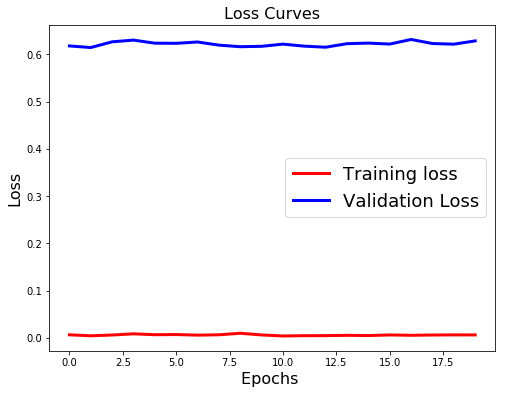

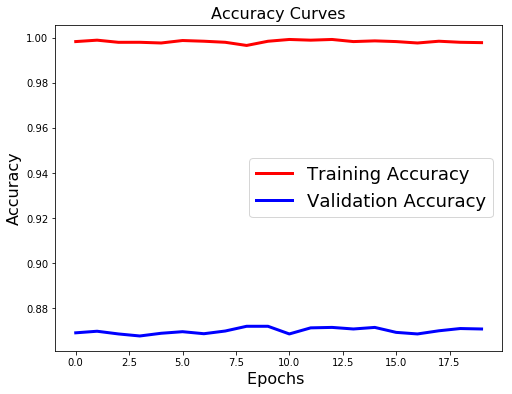

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=[8,6])
plt.plot(history2.history['loss'],'r',linewidth=3.0)
plt.plot(history2.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)


plt.figure(figsize=[8,6])
plt.plot(history2.history['acc'],'r',linewidth=3.0)
plt.plot(history2.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)
plt.show()

In [156]:
weights=[]

In [157]:
for i in range(18):
    if i==4 or i==9 or i==12 or i==15:
        continue
    print("i:",i)
    print("\nww:",len(model.layers[i].get_weights()))
    weights.append(model.layers[i].get_weights()[0])


i: 0

ww: 2
i: 1

ww: 4
i: 2

ww: 2
i: 3

ww: 4
i: 5

ww: 2
i: 6

ww: 4
i: 7

ww: 2
i: 8

ww: 4
i: 10

ww: 2
i: 11

ww: 4
i: 13

ww: 2
i: 14

ww: 4
i: 16

ww: 2
i: 17

ww: 4


In [153]:
bias=[]
for i in range(18):
    if i==4 or i==9 or i==12 or i==15:
        continue
    bias.append(model.layers[i].get_weights()[1])
    


In [158]:
print(len(weights))

14


In [171]:
import random
import numpy as np
import matplotlib.pyplot as plt


pos = [1, 2,3, 4,5,6,7,8,9,10,11,12,13,14]

plt.figure(figsize=[8,6])
plt.violinplot(weights, pos, points=15, widths=1,showmeans=True, showextrema=True, showmedians=True)


{'bodies': [<matplotlib.collections.PolyCollection at 0x7f541c6a3320>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f541c685f60>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f541c6854e0>,
 'cmeans': <matplotlib.collections.LineCollection at 0x7f541c6a3a58>,
 'cmedians': <matplotlib.collections.LineCollection at 0x7f541c6b54e0>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f541c685a20>}

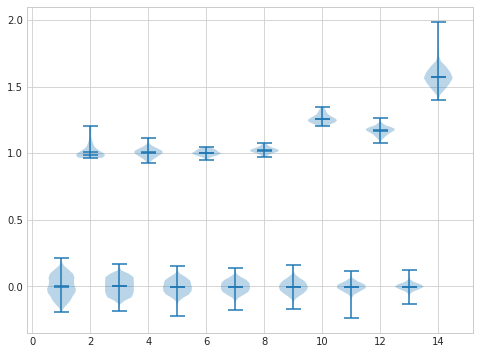

In [172]:
plt.show()

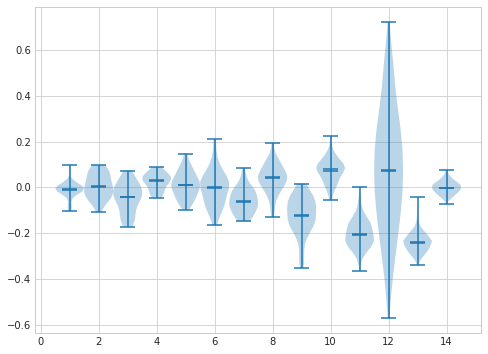

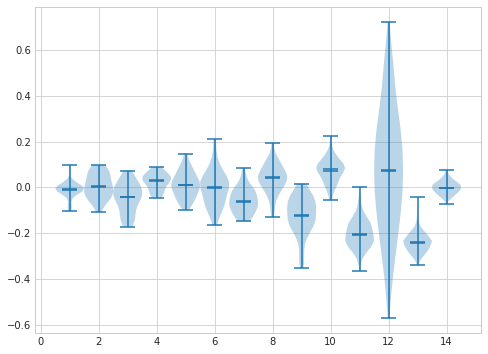

In [174]:
pos = [1, 2,3, 4,5,6,7,8,9,10,11,12,13,14]

plt.figure(figsize=[8,6])
plt.violinplot(bias, pos, points=15, widths=1,showmeans=True, showextrema=True, showmedians=True)
plt.show()